In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
traindf=pd.read_csv(r'C:\Users\Prajesh S\train.csv')
testdf=pd.read_csv(r'C:\Users\Prajesh S\test.csv')


In [4]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [5]:
traindf.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [6]:
traindf.isna().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [7]:
traindf.isna().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [8]:
traindf['gender']=traindf['gender'].fillna(traindf['gender'].mode()[0])

In [9]:
traindf.drop(['player_id','name'],axis=1)
testid=testdf['player_id']
testdf.drop(['player_id','name'],axis=1)

,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,...,max_running_speed,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications
0,16,F,Austria,6'1,163lbs,68.0,68.0,54.0,67.0,42.0,...,25.6,Right,6.5,0.0,7.7,3.0,Medium,Unknown,1.0,0.0
1,23,F,South Africa,5'9,170lbs,65.0,73.0,78.0,92.0,49.0,...,27.6,Right,5.1,1.0,6.1,3.0,Medium,Academy,9.0,0.0
2,18,F,Netherlands,5'10,154lbs,72.0,79.0,64.0,37.0,64.0,...,29.4,Left,5.8,0.0,8.4,2.0,Medium,Academy,3.0,0.0
3,24,F,China PR,6'0,168lbs,64.0,76.0,65.0,65.0,39.0,...,23.0,Right,5.2,0.0,6.2,6.0,High,Academy,10.0,0.0
4,20,F,Australia,6'0,163lbs,53.0,58.0,57.0,66.0,36.0,...,23.2,Right,4.7,0.0,6.9,3.0,Medium,Talent Hunt,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9325,27,F,England,6'3,172lbs,48.0,47.0,39.0,82.0,NaN,...,20.2,Right,NaN,0.0,7.0,2.0,High,Talent Hunt,NaN,0.0
9326,16,M,Belgium,6'3,169lbs,31.0,38.0,47.0,70.0,34.0,...,20.4,Right,4.7,NaN,5.8,5.0,Medium,Academy,2.0,0.0
9327,17,M,South Africa,5'10,154lbs,60.0,58.0,68.0,63.0,65.0,...,26.9,Any,5.1,0.0,6.2,5.0,Medium,Academy,3.0,0.0
9328,16,M,Italy,6'0,165lbs,17.0,32.0,36.0,42.0,11.0,...,9.2,NaN,5.0,0.0,1.6,2.0,Medium,Academy,2.0,0.0


<AxesSubplot:>

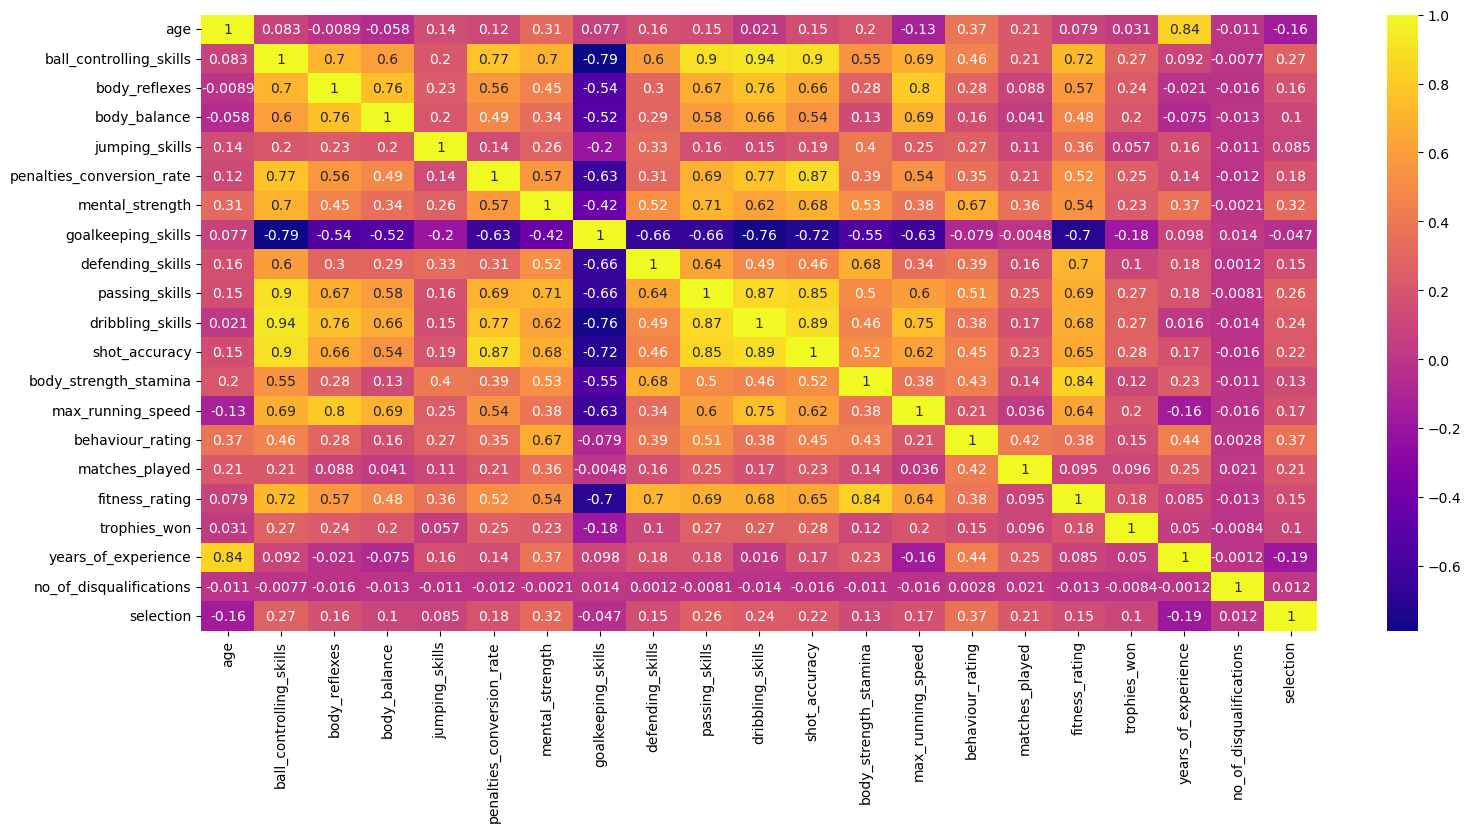

In [10]:
corr_matrix=traindf.corr()
plt.subplots(figsize=(18,8))
sns.heatmap(corr_matrix,annot=True,cmap='plasma')

In [11]:
traindf.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [12]:
traindf['gender']=traindf['gender'].fillna(traindf['gender'].mode())
traindf['weight']=traindf['weight'].fillna(traindf['weight'].mode()[0])
traindf['ball_controlling_skills']=traindf['ball_controlling_skills'].fillna(traindf['ball_controlling_skills'].mean())
traindf['body_reflexes']=traindf['body_reflexes'].fillna(traindf['body_reflexes'].mean())
traindf['jumping_skills']=traindf['jumping_skills'].fillna(traindf['jumping_skills'].mean())
traindf['penalties_conversion_rate']=traindf['penalties_conversion_rate'].fillna(traindf['penalties_conversion_rate'].mean())
traindf['mental_strength']=traindf['mental_strength'].fillna(traindf['mental_strength'].mean())
traindf['shot_accuracy']=traindf['shot_accuracy'].fillna(traindf['shot_accuracy'].mean())
traindf['strong_foot']=traindf['strong_foot'].fillna(traindf['strong_foot'].mode()[0])
traindf['coaching']=traindf['coaching'].fillna(traindf['coaching'].mode()[0])
traindf['behaviour_rating']=traindf['behaviour_rating'].fillna(traindf['behaviour_rating'].mean())
traindf['matches_played']=traindf['matches_played'].fillna(traindf['matches_played'].mean())
traindf['fitness_rating']=traindf['fitness_rating'].fillna(traindf['fitness_rating'].mean())
traindf['years_of_experience']=traindf['years_of_experience'].fillna(traindf['years_of_experience'].mean())

In [13]:
traindf.isna().sum()

player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

In [14]:
testdf['gender']=testdf['gender'].fillna(testdf['gender'].mode()[0])
testdf['weight']=testdf['weight'].fillna(testdf['weight'].mode()[0])
testdf['ball_controlling_skills']=traindf['ball_controlling_skills'].fillna(testdf['ball_controlling_skills'].mean())
testdf['body_reflexes']=testdf['body_reflexes'].fillna(testdf['body_reflexes'].mean())
testdf['jumping_skills']=testdf['jumping_skills'].fillna(testdf['jumping_skills'].mean())
testdf['penalties_conversion_rate']=testdf['penalties_conversion_rate'].fillna(testdf['penalties_conversion_rate'].mean())
testdf['mental_strength']=testdf['mental_strength'].fillna(testdf['mental_strength'].mean())
testdf['shot_accuracy']=testdf['shot_accuracy'].fillna(testdf['shot_accuracy'].mean())
testdf['strong_foot']=testdf['strong_foot'].fillna(testdf['strong_foot'].mode()[0])
testdf['coaching']=testdf['coaching'].fillna(testdf['coaching'].mode()[0])
testdf['behaviour_rating']=testdf['behaviour_rating'].fillna(testdf['behaviour_rating'].mean())
testdf['matches_played']=testdf['matches_played'].fillna(testdf['matches_played'].mean())
testdf['fitness_rating']=testdf['fitness_rating'].fillna(testdf['fitness_rating'].mean())
testdf['years_of_experience']=testdf['years_of_experience'].fillna(testdf['years_of_experience'].mean())

In [15]:
testdf.isna().sum()

player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
dtype: int64

In [16]:
testid=testdf['player_id']
testdf.drop(['player_id','name'],axis=1)

,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,...,max_running_speed,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications
0,16,F,Austria,6'1,163lbs,77.0,68.0,54.0,67.0,42.000000,...,25.6,Right,6.500000,0.000000,7.7,3.0,Medium,Unknown,1.00000,0.0
1,23,F,South Africa,5'9,170lbs,54.0,73.0,78.0,92.0,49.000000,...,27.6,Right,5.100000,1.000000,6.1,3.0,Medium,Academy,9.00000,0.0
2,18,F,Netherlands,5'10,154lbs,34.0,79.0,64.0,37.0,64.000000,...,29.4,Left,5.800000,0.000000,8.4,2.0,Medium,Academy,3.00000,0.0
3,24,F,China PR,6'0,168lbs,79.0,76.0,65.0,65.0,39.000000,...,23.0,Right,5.200000,0.000000,6.2,6.0,High,Academy,10.00000,0.0
4,20,F,Australia,6'0,163lbs,47.0,58.0,57.0,66.0,36.000000,...,23.2,Right,4.700000,0.000000,6.9,3.0,Medium,Talent Hunt,5.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9325,27,F,England,6'3,172lbs,19.0,47.0,39.0,82.0,48.297616,...,20.2,Right,5.832302,0.000000,7.0,2.0,High,Talent Hunt,6.45244,0.0
9326,16,M,Belgium,6'3,169lbs,74.0,38.0,47.0,70.0,34.000000,...,20.4,Right,4.700000,4.103511,5.8,5.0,Medium,Academy,2.00000,0.0
9327,17,M,South Africa,5'10,154lbs,52.0,58.0,68.0,63.0,65.000000,...,26.9,Any,5.100000,0.000000,6.2,5.0,Medium,Academy,3.00000,0.0
9328,16,M,Italy,6'0,165lbs,47.0,32.0,36.0,42.0,11.000000,...,9.2,Right,5.000000,0.000000,1.6,2.0,Medium,Academy,2.00000,0.0


In [17]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13994 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13994 non-null  object 
 7   ball_controlling_skills    13994 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13994 non-null  float64
 11  penalties_conversion_rate  13994 non-null  float64
 12  mental_strength            13994 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [18]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
traindf['gender']=lab_enc.fit_transform(traindf['gender'])
traindf['country']=lab_enc.fit_transform(traindf['country'])
traindf['height']=lab_enc.fit_transform(traindf['height'])
traindf['weight']=lab_enc.fit_transform(traindf['weight'])
traindf['strong_foot']=lab_enc.fit_transform(traindf['strong_foot'])
traindf['dedication_level']=lab_enc.fit_transform(traindf['dedication_level'])
traindf['coaching']=lab_enc.fit_transform(traindf['coaching'])

<AxesSubplot:>

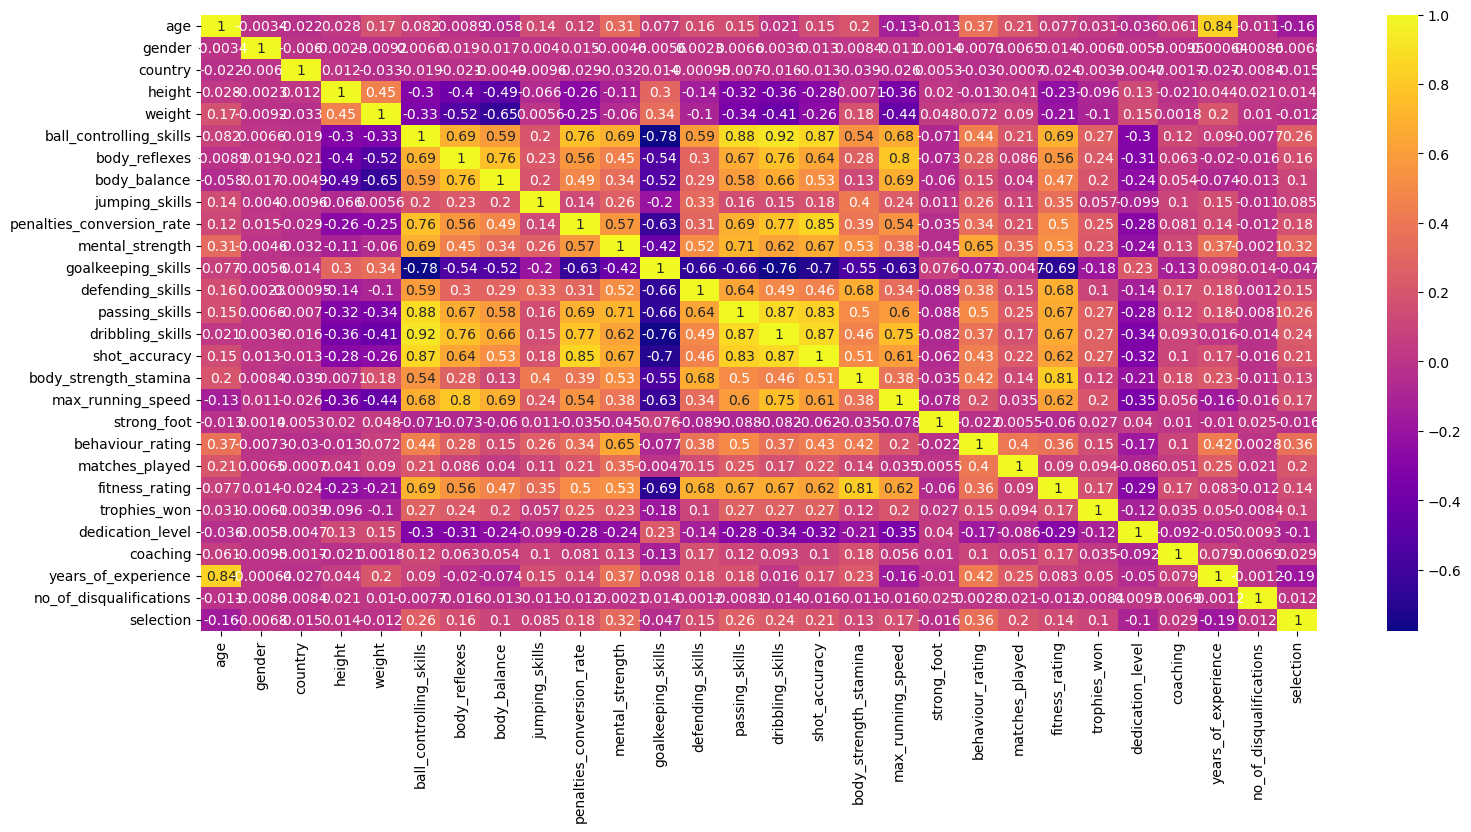

In [19]:
corr_matrix=traindf.corr()
plt.subplots(figsize=(18,8))
sns.heatmap(corr_matrix,annot=True,cmap='plasma')

In [20]:
testdf['gender']=lab_enc.fit_transform(testdf['gender'])
testdf['country']=lab_enc.fit_transform(testdf['country'])
testdf['height']=lab_enc.fit_transform(testdf['height'])
testdf['weight']=lab_enc.fit_transform(testdf['weight'])
testdf['strong_foot']=lab_enc.fit_transform(testdf['strong_foot'])
testdf['dedication_level']=lab_enc.fit_transform(testdf['dedication_level'])
testdf['coaching']=lab_enc.fit_transform(testdf['coaching'])

In [21]:
X=traindf.drop(['selection'],axis=1)
y=traindf['selection']

In [22]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.2)

In [23]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13994 non-null  int32  
 4   country                    13994 non-null  int32  
 5   height                     13994 non-null  int32  
 6   weight                     13994 non-null  int32  
 7   ball_controlling_skills    13994 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13994 non-null  float64
 11  penalties_conversion_rate  13994 non-null  float64
 12  mental_strength            13994 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [24]:
traindf=traindf.drop(['player_id','name'],axis=1)
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        13994 non-null  int64  
 1   gender                     13994 non-null  int32  
 2   country                    13994 non-null  int32  
 3   height                     13994 non-null  int32  
 4   weight                     13994 non-null  int32  
 5   ball_controlling_skills    13994 non-null  float64
 6   body_reflexes              13994 non-null  float64
 7   body_balance               13994 non-null  float64
 8   jumping_skills             13994 non-null  float64
 9   penalties_conversion_rate  13994 non-null  float64
 10  mental_strength            13994 non-null  float64
 11  goalkeeping_skills         13994 non-null  float64
 12  defending_skills           13994 non-null  float64
 13  passing_skills             13994 non-null  flo

In [25]:
X=traindf.drop(['selection'],axis=1)
y=traindf['selection']

In [26]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.2)

In [27]:
lr_model=LogisticRegression().fit(X_train,y_train)
y_pred_log=lr_model.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
confusion_matrix(y_test,y_pred_log)
print('Accuracy score is :',accuracy_score(y_test,y_pred_log))


Accuracy score is : 0.7663451232583065


C:\Users\Prajesh S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
precision_score(y_test,y_pred_log)


0.7595166163141994

In [29]:
recall_score(y_test,y_pred_log)


0.8307997356245869

In [30]:
f1_score(y_test,y_pred_log)


0.7935606060606062

In [31]:
from sklearn.metrics import classification_report
print('classification_report :\n',classification_report(y_test,y_pred_log))

classification_report :
               precision    recall  f1-score   support

           0       0.78      0.69      0.73      1286
           1       0.76      0.83      0.79      1513

    accuracy                           0.77      2799
   macro avg       0.77      0.76      0.76      2799
weighted avg       0.77      0.77      0.76      2799



In [32]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=range(3,15)

for k in neighbors:
     classifier=KNeighborsClassifier(n_neighbors=k)
     kNN_model=classifier.fit(X_train,y_train)
     y_pred_kNN=kNN_model.predict(X_test)
     acc=accuracy_score(y_test,y_pred_kNN)
     metric_k.append(acc)

C:\Users\Prajesh S\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Prajesh S\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

In [33]:
metric_k

[0.7070382279385495,
 0.720971775634155,
 0.7163272597356198,
 0.7249017506252233,
 0.7238299392640228,
 0.728474455162558,
 0.721686316541622,
 0.7302608074312255,
 0.7238299392640228,
 0.7356198642372276,
 0.7356198642372276,
 0.7399071096820293]

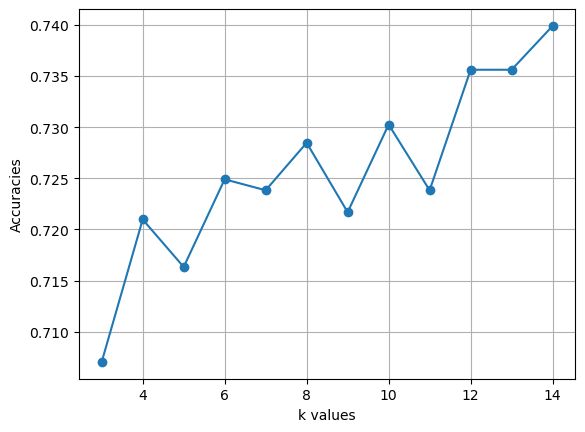

In [34]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()

In [35]:
accuracy_score(y_test,y_pred_kNN)

0.7399071096820293

In [36]:
classifier=KNeighborsClassifier(n_neighbors=11)
kNN_model=classifier.fit(X_train,y_train)
y_pred_kNN=kNN_model.predict(X_test)

C:\Users\Prajesh S\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [37]:
confusion_matrix(y_test,y_pred_kNN)

array([[ 838,  448],
       [ 325, 1188]], dtype=int64)

In [38]:
accuracy_score(y_test,y_pred_kNN)

0.7238299392640228

In [39]:
precision_score(y_test,y_pred_kNN)

0.726161369193154

In [40]:
recall_score(y_test,y_pred_kNN)

0.7851949768671513

In [41]:
print('classification_report :\n',classification_report(y_test,y_pred_kNN))

classification_report :
               precision    recall  f1-score   support

           0       0.72      0.65      0.68      1286
           1       0.73      0.79      0.75      1513

    accuracy                           0.72      2799
   macro avg       0.72      0.72      0.72      2799
weighted avg       0.72      0.72      0.72      2799



In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dec_tree_model=DecisionTreeClassifier().fit(X_train,y_train)
y_pred_tree=dec_tree_model.predict(X_test)

In [44]:
confusion_matrix(y_test,y_pred_tree)

array([[ 962,  324],
       [ 286, 1227]], dtype=int64)

In [45]:
accuracy_score(y_test,y_pred_tree)

0.7820650232225795

In [46]:
precision_score(y_test,y_pred_tree)

0.7911025145067698

In [47]:
recall_score(y_test,y_pred_tree)

0.8109715796430932

In [48]:
f1_score(y_test,y_pred_tree)

0.8009138381201044

In [49]:
print('classification_report :\n',classification_report(y_test,y_pred_tree))

classification_report :
               precision    recall  f1-score   support

           0       0.77      0.75      0.76      1286
           1       0.79      0.81      0.80      1513

    accuracy                           0.78      2799
   macro avg       0.78      0.78      0.78      2799
weighted avg       0.78      0.78      0.78      2799



In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rand_for_model=RandomForestClassifier().fit(X_train,y_train)
y_pred_rand=rand_for_model.predict(X_test)

In [52]:
confusion_matrix(y_test,y_pred_rand)

array([[1054,  232],
       [ 177, 1336]], dtype=int64)

In [53]:
accuracy_score(y_test,y_pred_rand)

0.8538763844230082

In [54]:
precision_score(y_test,y_pred_rand)

0.8520408163265306

In [55]:
recall_score(y_test,y_pred_rand)

0.8830138797091871

In [56]:
f1_score(y_test,y_pred_rand)

0.8672508925673483

In [57]:
print('classification_report :\n',classification_report(y_test,y_pred_rand))

classification_report :
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1286
           1       0.85      0.88      0.87      1513

    accuracy                           0.85      2799
   macro avg       0.85      0.85      0.85      2799
weighted avg       0.85      0.85      0.85      2799



In [58]:
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
grad_boost_model=GradientBoostingClassifier().fit(X_train,y_train)
y_pred_grad=grad_boost_model.predict(X_test)

In [60]:
confusion_matrix(y_test,y_pred_grad)

array([[1076,  210],
       [ 203, 1310]], dtype=int64)

In [61]:
accuracy_score(y_test,y_pred_grad)

0.8524473026080743

In [62]:
precision_score(y_test,y_pred_grad)

0.8618421052631579

In [63]:
recall_score(y_test,y_pred_grad)

0.8658294778585591

In [64]:
f1_score(y_test,y_pred_grad)

0.8638311902406857

In [65]:
print('classification_report :\n',classification_report(y_test,y_pred_grad))

classification_report :
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1286
           1       0.86      0.87      0.86      1513

    accuracy                           0.85      2799
   macro avg       0.85      0.85      0.85      2799
weighted avg       0.85      0.85      0.85      2799



In [66]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9330 entries, 0 to 9329
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  9330 non-null   object 
 1   name                       9330 non-null   object 
 2   age                        9330 non-null   int64  
 3   gender                     9330 non-null   int32  
 4   country                    9330 non-null   int32  
 5   height                     9330 non-null   int32  
 6   weight                     9330 non-null   int32  
 7   ball_controlling_skills    9330 non-null   float64
 8   body_reflexes              9330 non-null   float64
 9   body_balance               9330 non-null   float64
 10  jumping_skills             9330 non-null   float64
 11  penalties_conversion_rate  9330 non-null   float64
 12  mental_strength            9330 non-null   float64
 13  goalkeeping_skills         9330 non-null   float

In [67]:
testdf=testdf.drop(['player_id','name'],axis=1)
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9330 entries, 0 to 9329
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        9330 non-null   int64  
 1   gender                     9330 non-null   int32  
 2   country                    9330 non-null   int32  
 3   height                     9330 non-null   int32  
 4   weight                     9330 non-null   int32  
 5   ball_controlling_skills    9330 non-null   float64
 6   body_reflexes              9330 non-null   float64
 7   body_balance               9330 non-null   float64
 8   jumping_skills             9330 non-null   float64
 9   penalties_conversion_rate  9330 non-null   float64
 10  mental_strength            9330 non-null   float64
 11  goalkeeping_skills         9330 non-null   float64
 12  defending_skills           9330 non-null   float64
 13  passing_skills             9330 non-null   float

In [71]:
X1=testdf

In [72]:
predicted_value = grad_boost_model.predict(X1)

In [73]:
final_prediction_df = pd.DataFrame()
final_prediction_df = testdf
final_prediction_df["selection"] = predicted_value
final_prediction_df.to_csv("Final selection Prediction.csv", index=False)
final_prediction_df.head()

,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,16,0,8,15,37,77.0,68.0,54.0,67.0,42.0,...,3,6.5,0.0,7.7,3.0,2,3,1.0,0.0,1
1,23,0,125,13,42,54.0,73.0,78.0,92.0,49.0,...,3,5.1,1.0,6.1,3.0,2,0,9.0,0.0,0
2,18,0,97,4,29,34.0,79.0,64.0,37.0,64.0,...,1,5.8,0.0,8.4,2.0,2,0,3.0,0.0,1
3,24,0,25,14,40,79.0,76.0,65.0,65.0,39.0,...,3,5.2,0.0,6.2,6.0,0,0,10.0,0.0,0
4,20,0,7,14,37,47.0,58.0,57.0,66.0,36.0,...,3,4.7,0.0,6.9,3.0,2,2,5.0,0.0,0


In [74]:
final_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9330 entries, 0 to 9329
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        9330 non-null   int64  
 1   gender                     9330 non-null   int32  
 2   country                    9330 non-null   int32  
 3   height                     9330 non-null   int32  
 4   weight                     9330 non-null   int32  
 5   ball_controlling_skills    9330 non-null   float64
 6   body_reflexes              9330 non-null   float64
 7   body_balance               9330 non-null   float64
 8   jumping_skills             9330 non-null   float64
 9   penalties_conversion_rate  9330 non-null   float64
 10  mental_strength            9330 non-null   float64
 11  goalkeeping_skills         9330 non-null   float64
 12  defending_skills           9330 non-null   float64
 13  passing_skills             9330 non-null   float

In [75]:
final_prediction_df=final_prediction_df['selection']
final_prediction_df

0       1
1       0
2       1
3       0
4       0
       ..
9325    0
9326    1
9327    0
9328    0
9329    0
Name: selection, Length: 9330, dtype: int64

In [76]:
final_prediction_df1=pd.concat([testid,final_prediction_df],axis=1)
final_prediction_df1

,player_id,selection
0,PLID_14644,1
1,PLID_5934,0
2,PLID_5074,1
3,PLID_17357,0
4,PLID_13993,0
...,...,...
9325,PLID_7718,0
9326,PLID_1563,1
9327,PLID_6017,0
9328,PLID_9370,0


In [77]:
final_prediction_df1.to_csv("Final overall Prediction1.csv", index=False)